<a href="https://colab.research.google.com/github/sumiyabintaymostofa/ransomware/blob/main/ransomware%20.%20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/data_file.csv') #download and paste here the link from google drive


In [4]:
# Preview shape and column names
print("Dataset loaded successfully.")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset loaded successfully.
Shape: (62485, 18)
Columns: ['FileName', 'md5Hash', 'Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion', 'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion', 'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize', 'BitcoinAddresses', 'Benign']


In [13]:
# Show first few rows
display(df.head())

# Show value counts for 'Benign' column
display(df['Benign'].value_counts())

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


,count
Benign,
0,35367
1,27118


In [14]:
# Drop identifier columns
drop_cols = ['md5', 'sha1', 'file_extension']

In [17]:
# Create df1 for 'Class' prediction
drop_cols = ['md5Hash', 'FileName']
df1 = df.drop(columns=drop_cols)
df1 = df1.select_dtypes(include=['int64', 'float64']).merge(df[['Benign']], left_index=True, right_index=True)

In [22]:
# Create df2 for 'Category' prediction
drop_cols = ['md5Hash', 'FileName']
df2 = df.drop(columns=drop_cols)
df2 = df2.select_dtypes(include=['int64', 'float64']).merge(df[['Benign']], left_index=True, right_index=True)

In [23]:
# Create df3 for 'Family' prediction
drop_cols = ['md5Hash', 'FileName']
df3 = df.drop(columns=drop_cols)
df3 = df3.select_dtypes(include=['int64', 'float64']).merge(df[['Benign']], left_index=True, right_index=True)

print("df1, df2, df3 created successfully:")
print("df1 shape (Class):", df1.shape)
print("df2 shape (Category):", df2.shape)
print("df3 shape (Family):", df3.shape)


df1, df2, df3 created successfully:
df1 shape (Class): (62485, 17)
df2 shape (Category): (62485, 17)
df3 shape (Family): (62485, 17)


In [24]:
#df1, df2, df3 created successfully:
#df1 shape (Class): (21752, 19)
#df2 shape (Category): (21752, 19)
#df3 shape (Family): (21752, 19)

In [25]:
#Binary Class Classification

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
# 1. Feature-label split
X = df1.drop(columns=['Benign_x'])
y = df1['Benign_y']

In [29]:
# 2. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [31]:
# 3. Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded

)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# 4. Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [33]:
# 5. Train, Predict, Evaluate
plt.figure(figsize=(10, 6))
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n {name} Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



 Decision Tree Metrics:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
Confusion Matrix:
 [[7073    0]
 [   0 5424]]

 KNN Metrics:
Accuracy : 0.9994398655677362
Precision: 0.99926267281106
Recall   : 0.9994469026548672
F1 Score : 0.9993547792423265
Confusion Matrix:
 [[7069    4]
 [   3 5421]]

 Random Forest Metrics:
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
Confusion Matrix:
 [[7073    0]
 [   0 5424]]


<Figure size 1000x600 with 0 Axes>

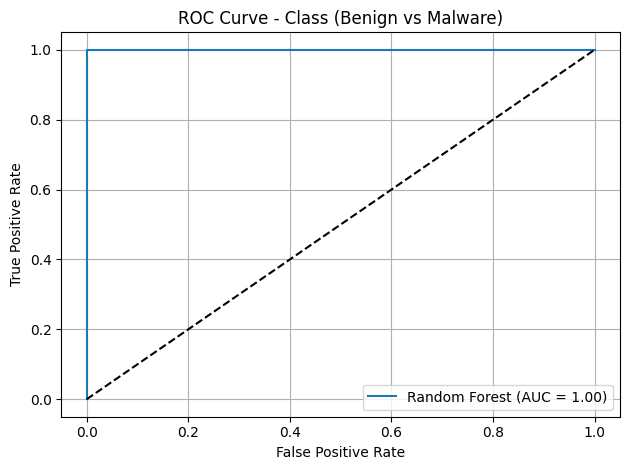

In [36]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
# 6. Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Class (Benign vs Malware)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#ROC Curve for Binary Class Classification




In [52]:
#Multiclass Classification (14 Classes)

from sklearn.metrics import classification_report